In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [5]:

data = pd.read_csv("/content/OPTIMAL_combined_3studies_6feb2020 (1).csv")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1842 non-null   int64  
 1   age                   1842 non-null   float64
 2   gender                1842 non-null   object 
 3   dementia              1808 non-null   float64
 4   dementia_all          1842 non-null   int64  
 5   educationyears        1842 non-null   float64
 6   EF                    1634 non-null   float64
 7   PS                    1574 non-null   float64
 8   Global                1534 non-null   float64
 9   diabetes              1842 non-null   int64  
 10  smoking               1831 non-null   object 
 11  hypertension          1842 non-null   object 
 12  hypercholesterolemia  1842 non-null   object 
 13  lacunes_num           1842 non-null   object 
 14  fazekas_cat           1842 non-null   object 
 15  study                

In [7]:
data.shape

(1842, 22)

In [8]:

data.dropna(inplace=True)

In [9]:

data = pd.get_dummies(data, drop_first=True)

In [16]:

columns_to_drop = [
    "ID", "educationyears", "Global", "CMB_count_>=1", "lac_count_Zero",
    "lac_count_>5", "study1_rundmc", "study_rundmc", "lac_count_3 to 5",
    "PS", "EF"
]


data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [17]:

corr_matrix = data.corr()
print(corr_matrix)

                               age  dementia  dementia_all  diabetes  \
age                       1.000000  0.206373      0.206373  0.116978   
dementia                  0.206373  1.000000      1.000000  0.078324   
dementia_all              0.206373  1.000000      1.000000  0.078324   
diabetes                  0.116978  0.078324      0.078324  1.000000   
SVD Simple Score          0.333913  0.293387      0.293387  0.103413   
SVD Amended Score         0.290521  0.328759      0.328759  0.115125   
Fazekas                   0.363558  0.234650      0.234650  0.084334   
gender_male              -0.048894  0.066115      0.066115  0.050309   
smoking_ex-smoker        -0.006552 -0.012981     -0.012981  0.035413   
smoking_never-smoker      0.115054 -0.031964     -0.031964 -0.036260   
hypertension_Yes          0.288367  0.121933      0.121933  0.100739   
hypercholesterolemia_Yes  0.129667  0.043340      0.043340  0.125906   
lacunes_num_zero         -0.240332 -0.257903     -0.257903 -0.13

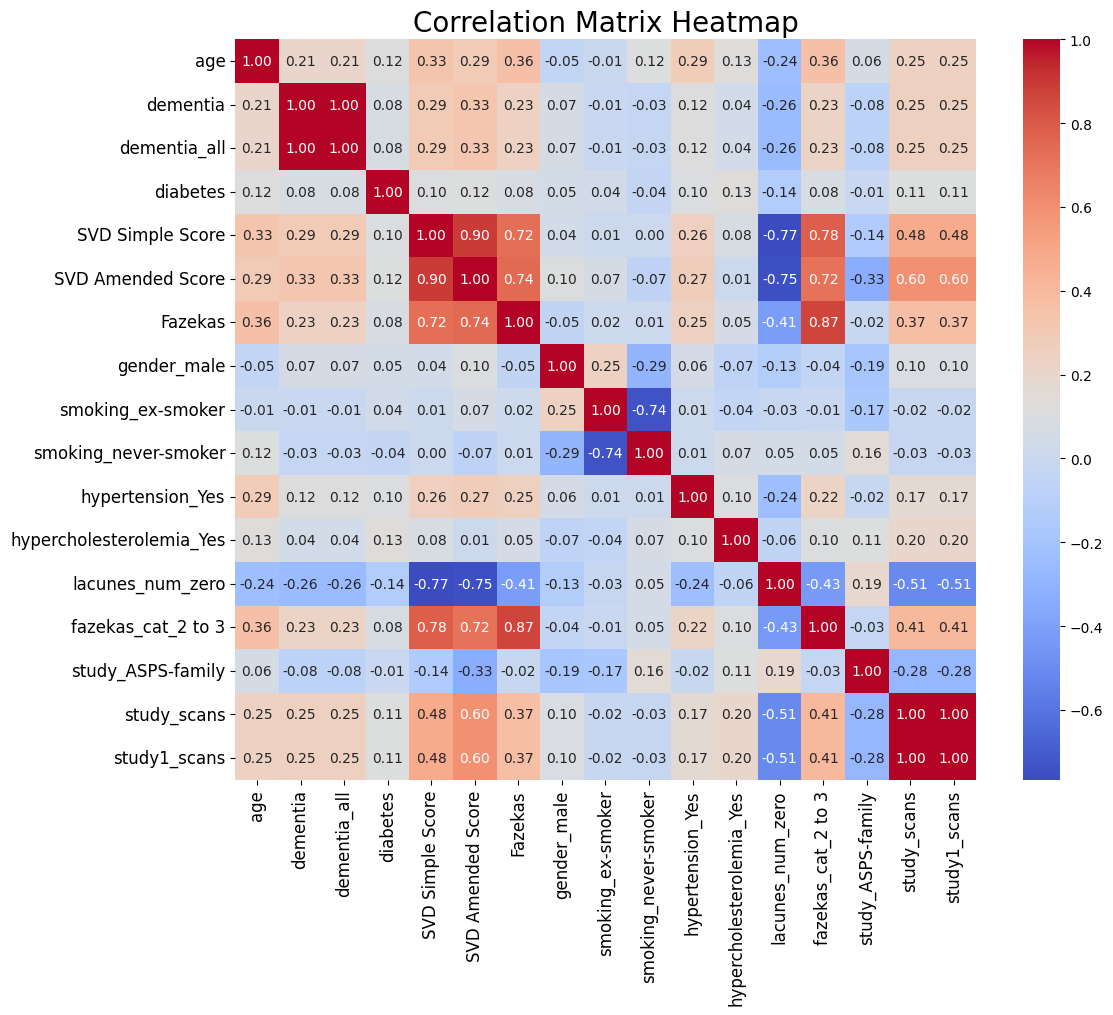

In [18]:
# Visualize the correlation matrix (optional)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [22]:

X = data.drop(['dementia', 'dementia_all'], axis=1)  
y = data['dementia']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(kernel='linear', probability=True, random_state=42)

In [24]:

rf_model.fit(X_train, y_train)


svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [25]:

voting_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='soft')  

In [26]:

voting_model.fit(X_train, y_train)


voting_predictions = voting_model.predict(X_test)

In [27]:

print(f"\nEnsemble Model Accuracy: {accuracy_score(y_test, voting_predictions):.4f}")
print("\nClassification Report for Ensemble Model:\n")
print(classification_report(y_test, voting_predictions, digits=4))


Ensemble Model Accuracy: 0.9189

Classification Report for Ensemble Model:

              precision    recall  f1-score   support

         0.0     0.9189    1.0000    0.9577       170
         1.0     0.0000    0.0000    0.0000        15

    accuracy                         0.9189       185
   macro avg     0.4595    0.5000    0.4789       185
weighted avg     0.8444    0.9189    0.8801       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:

print("\nRandom Forest Model Accuracy:", accuracy_score(y_test, rf_model.predict(X_test)))
print("\nSVM Model Accuracy:", accuracy_score(y_test, svm_model.predict(X_test)))


Random Forest Model Accuracy: 0.918918918918919

SVM Model Accuracy: 0.918918918918919
